# Chapter 4 Laboratory

## The normal distribution

In this lab, you’ll investigate the probability distribution that is most central to statistics: the normal distribution. If you are confident that your data are nearly normal, that opens the door to many powerful statistical methods. Here we’ll use the graphical tools of Python to assess the normality of our data and also learn how to generate random numbers from a normal distribution.

## Getting Started

### Load packages

In this lab, we will explore and visualize the data using the PyData suite of packages.
Let’s load the packages.

In [81]:
%matplotlib inline

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy
import statsmodels.api as sm

from pathlib import Path

plt.ion()

## The data

This week you’ll be working with fast food data. This data set contains data on 515 menu items from some of the most popular fast food restaurants worldwide. Let’s take a quick peek at the first few rows of the data.

In [63]:
fastfood_path = Path("../datasets/fastfood.csv")
fastfood_df = pd.read_csv(fastfood_path)

fastfood_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


You’ll see that for every observation there are 17 measurements, many of which are nutritional facts.

You’ll be focusing on just three columns to get started: restaurant, calories, calories from fat.

Let’s first focus on just products from McDonalds and Dairy Queen.

In [64]:
mcdonalds = fastfood_df[fastfood_df["restaurant"] == "Mcdonalds"]
dairy_queen = fastfood_df[fastfood_df["restaurant"] == "Dairy Queen"]

### Exercise 1 - Make a plot (or plots) to visualize the distributions of the amount of calories from fat of the options from these two restaurants. How do their centers, shapes, and spreads compare?

[]

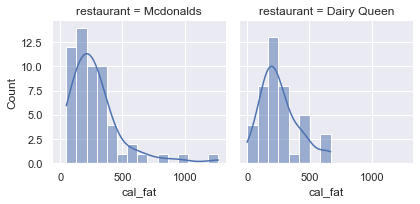

In [65]:
sns.set_theme()

# sns.displot(data=pd.concat([mcdonalds, dairy_queen]), x="cal_fat", kind="kde", hue="restaurant")

comp_mc_dairy_plot = sns.FacetGrid(pd.concat([mcdonalds, dairy_queen]), col="restaurant")
comp_mc_dairy_plot.map(sns.histplot, "cal_fat", kde=True)

plt.plot()

We can see that their center is pretty much similar. Regarding the sape, the first (McDonald's) is more right skewed than the second (Dairy Queen), and it also has more spread.

## The normal distribution

In your description of the distributions, did you use words like _bell-shaped_ or _normal_? It’s tempting to say so when faced with a unimodal symmetric distribution.

To see how accurate that description is, you can plot a normal distribution curve on top of a histogram to see how closely the data follow a normal distribution. This normal curve should have the same mean and standard deviation as the data. You’ll be focusing on calories from fat from Dairy Queen products, so let’s store them as a separate object and then calculate some statistics that will be referenced later.

In [66]:
dqmean = dairy_queen["cal_fat"].mean()
dqstd = dairy_queen["cal_fat"].std()

Next, you make a density histogram to use as the backdrop and you overlay a normal probability curve. The difference between a frequency histogram and a density histogram is that while in a frequency histogram the heights of the bars add up to the total number of observations, in a density histogram the _areas_ of the bars add up to 1. The area of each bar can be calculated as simply the height _times_ the width of the bar. Using a density histogram allows us to properly overlay a normal distribution curve over the histogram since the curve is a normal probability density function that also has area under the curve of 1. Frequency and density histograms both display the same exact shape; they only differ in their y-axis. You can verify this by comparing the frequency histogram you constructed earlier and the density histogram created by the commands below.

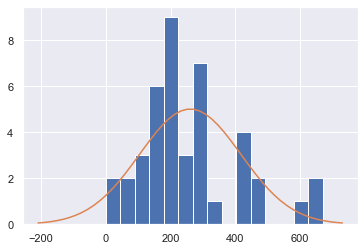

In [85]:
n_bins = 15

x_dairy_cal_fat = np.linspace(dqmean - 3 * dqstd , dqmean + 3 * dqstd)
y_dairy_cal_fat = scipy.stats.norm.pdf(x_dairy_cal_fat, loc=dqmean, scale=dqstd)

scale_factor = pd.qcut(dairy_queen["cal_fat"], q=n_bins).value_counts().max()

y_dairy_cal_fat = y_dairy_cal_fat * (1 / y_dairy_cal_fat.max()) * scale_factor

plt.hist(x=dairy_queen["cal_fat"], bins=n_bins)
plt.plot(x_dairy_cal_fat, y_dairy_cal_fat)

plt.show()

### Exercise 2 - Based on the this plot, does it appear that the data follow a nearly normal distribution?

It's very similar to the normal distribution, even though we miss the left tail.

## Evaluating the normal distribution

Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed, but it can be frustrating to decide just how close the histogram is to the curve. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot for “quantile-quantile”.

/Users/riccardopesce/opt/miniconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


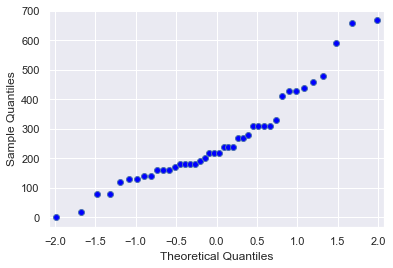

In [101]:
fig = sm.qqplot(dairy_queen["cal_fat"], scipy.stats.norm)

plt.show()

The x-axis values correspond to the quantiles of a theoretically normal curve with mean 0 and standard deviation 1 (i.e., the standard normal distribution). The y-axis values correspond to the quantiles of the original unstandardized sample data. However, even if we were to standardize the sample data values, the Q-Q plot would look identical. A data set that is nearly normal will result in a probability plot where the points closely follow a diagonal line. Any deviations from normality leads to deviations of these points from that line.

The plot for Dairy Queen’s calories from fat shows points that tend to follow the line but with some errant points towards the upper tail. You’re left with the same problem that we encountered with the histogram above: how close is close enough?